In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 5 --client_opt_name sgd --client_epoch 1 --client_lr 0.01 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --apply_lora --lora_rank 16 --sketch_size -1

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --apply_lora --lora_rank 16

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 0.0001 --epoch 2000 --analysis loss --log_interval 10 --batch_size 128 --momentum 0.9 --weight_decay 1e-4
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 0.0001 --epoch 500 --analysis loss --log_interval 10 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --apply_lora --lora_rank 16

results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lora_rank_16/lora_alpha_16/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lora_rank_16/lora_alpha_16/cls_lr_0.0001/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/


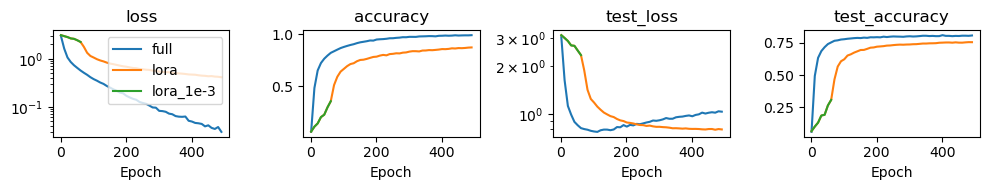

In [15]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0001, "20newsgroups", 'CrossEntropyLoss', "sgd", 0.9, 1e-4, 128, 500
model_name= "gpt2"

model_params = {}
model_params["full"] = {}
model_params["lora"] = {"lora_rank": 16, "lora_alpha": 16}
model_params["lora_1e-3"] = {"lora_rank": 16, "lora_alpha": 16, "cls_lr": 0.0001}

opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':"sgd", 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_1e-3"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':"sgd", 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full", "lora", "lora_1e-3"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.1 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 5 --sketch_size -1 --apply_lora --lora_rank 16 --cls_lr 0.1

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_5.0/lora_rank_16/lora_alpha_16/cls_lr_0.1/server_opt_sgd/client_opt_sgd/client_lr_0.0001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_500/


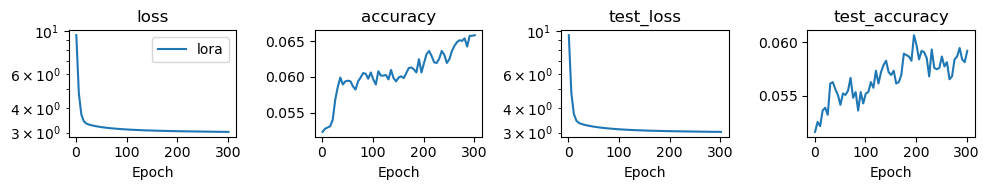

In [38]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 1.0, "20newsgroups", 'CrossEntropyLoss', "federated", 0.0, 0.0001, 128, 500
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.0001, 0.9, 0.0, 10, 1, -1, 5.0

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "cls_lr": 0.1, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
#adam as server optimizer
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.01/moment_0.9/wd_0.01/batch_size_128/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_128/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight

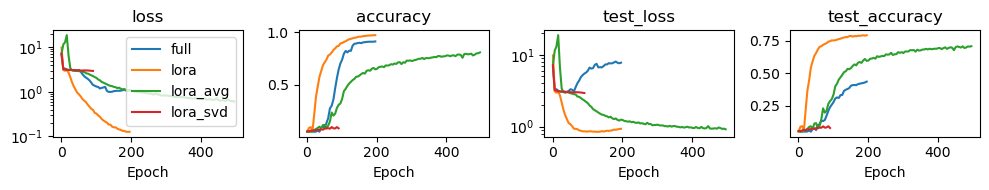

In [2]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.0, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':200}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full", "lora", "lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd